In [30]:
#import all libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import statistics
import shap
import math
import matplotlib.pyplot as plt
from xgboost import plot_tree
import graphviz
from sklearn.metrics import confusion_matrix


In [2]:
#read in the csv
df_dating=pd.read_csv('Speed Dating Data.csv',encoding = "ISO-8859-1")
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
df_dating=df_dating.loc[:, 'iid':'amb3_s']
df_dating=df_dating.drop(['field','career' ,'from','idg','id','partner','undergra','dec','dec_o'],axis='columns') #dropping identifiers and string columns and decision variables

In [3]:
#make all the columns integers
df_dating=df_dating.fillna(-1)
df_dating.head()
df_dating['iid'].nunique()
df_dating.head()

,iid,gender,condtn,wave,round,position,positin1,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,mn_sat,tuition,race,imprace,imprelig,zipcode,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s
0,1,0,1,1,10,7,-1.0,4,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,-1,-1,4.0,2.0,4.0,"60,521","69,487.00",2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,0,1,1,10,7,-1.0,3,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,-1,-1,4.0,2.0,4.0,"60,521","69,487.00",2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,0,1,1,10,7,-1.0,10,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,-1,-1,4.0,2.0,4.0,"60,521","69,487.00",2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,-1.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,0,1,1,10,7,-1.0,5,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,-1,-1,4.0,2.0,4.0,"60,521","69,487.00",2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,0,1,1,10,7,-1.0,7,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,-1,-1,4.0,2.0,4.0,"60,521","69,487.00",2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [4]:
#trying to make all values ints
df_dating['zipcode'] = df_dating['zipcode'].replace(',','', regex=True)
df_dating['zipcode'] = df_dating['zipcode'].apply(pd.to_numeric)
# do the same for income
df_dating['income'] = df_dating['income'].replace(',','', regex=True)
df_dating['income'] = df_dating['income'].apply(pd.to_numeric)
# do the same for mn_sat
df_dating['mn_sat'] = df_dating['mn_sat'].replace(',','', regex=True)
df_dating['mn_sat'] = df_dating['mn_sat'].apply(pd.to_numeric)
# do the same for tuition
df_dating['tuition'] = df_dating['tuition'].replace(',','', regex=True)
df_dating['tuition'] = df_dating['tuition'].apply(pd.to_numeric)
#remove periods
df_dating["pid"] = df_dating["pid"].astype(int)

In [5]:
df_zip=df_dating[['iid','zipcode']]
part_zip_ls=[]
row=0
for pid in df_dating['pid']:
    try:
        part_zip=df_zip.loc[df_zip['iid']== pid,'zipcode'].unique()[0]
        part_zip_ls.append(part_zip)
        row=row+1
#         print('row:',row)
#         print(part_zip)
    except:
        part_zip_ls.append(-1)
df_dating['part_zip']=part_zip_ls


In [6]:
df_dating.head()

,iid,gender,condtn,wave,round,position,positin1,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,mn_sat,tuition,race,imprace,imprelig,zipcode,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,part_zip
0,1,0,1,1,10,7,-1.0,4,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,60521,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,1,0,1,1,10,7,-1.0,3,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,60521,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14850
2,1,0,1,1,10,7,-1.0,10,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,60521,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,-1.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,92821
3,1,0,1,1,10,7,-1.0,5,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,60521,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,45243
4,1,0,1,1,10,7,-1.0,7,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,60521,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,33183


In [7]:
#create the zip_match
df_dating['zip_match']=(df_dating['zipcode']==df_dating['part_zip'])
df_dating['zip_match']=df_dating['zip_match'].astype(int)
df_dating.head()
df_dating=df_dating.drop(['part_zip','zipcode'],axis='columns')
df_dating.head()


,iid,gender,condtn,wave,round,position,positin1,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,mn_sat,tuition,race,imprace,imprelig,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,zip_match
0,1,0,1,1,10,7,-1.0,4,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,1,0,1,1,10,7,-1.0,3,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,1,0,1,1,10,7,-1.0,10,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,-1.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
3,1,0,1,1,10,7,-1.0,5,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
4,1,0,1,1,10,7,-1.0,7,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,-1.0,-1.0,4.0,2.0,4.0,69487.0,2.0,7.0,1.0,-1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [8]:
#split the data into X and y
X=df_dating.loc[:,df_dating.columns != 'match']
y=df_dating['match']

In [9]:
std_scl_ftrs =X.columns

num_trsfm = Pipeline(steps=[
    ('std_scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', num_trsfm, std_scl_ftrs)])


In [10]:
#Split the data using group kfold or group shuffle splits within 3 loops.


best_mod_ls=[]
test_scores_ls=[]
test_sets_ls=[]
bl_score_ls=[]
for rand_state in range(3):
    groups=df_dating['wave']
    gss1 = GroupShuffleSplit(n_splits=3, train_size=.6, random_state=rand_state)
    for train_idx, other_idx in gss1.split(X, y, groups):
    #     print("TRAIN:", train_idx, "other:", other_idx)


        X_train = X.loc[train_idx]
        X_other = X.loc[other_idx].reset_index(drop=True)
        y_train = y.loc[train_idx]
        y_other = y.loc[other_idx].reset_index(drop=True)

        groups=X_other['wave']
        gss2 = GroupShuffleSplit(n_splits=1, train_size=.5, random_state=rand_state)
        for val_idx, test_idx in gss1.split(X_other, y_other, groups):
    #         print("VAL:", val_idx, "TEST:", test_idx)
            X_val=X_other.loc[val_idx].reset_index(drop=True)
            y_val=y_other.loc[val_idx].reset_index(drop=True)
            X_test=X_other.loc[test_idx].reset_index(drop=True)
            y_test=y_other.loc[test_idx].reset_index(drop=True)

    # X_train['wave'].unique()
    # X_val['wave'].unique()
    # X_test['wave'].unique()
    
    #create a prediction for baseline where we predict all class 1.
    #the baseline model will always predict match to maximize the true positive.
    #the recall will be 1 because we are always preicting positive.
    y_row=len(y_test)
    y_dummy_pred=[1] * y_row
    #calculate baseline F1 score
    bl_f1=f1_score(y_dummy_pred, y_test, average='macro')
    bl_score_ls.append(bl_f1)
#     print(bl_f1)
    
    
    #after split we are going to preprocess
    #build x training data frame
    X_train_tran=preprocessor.fit_transform(X_train)
    feature_names=preprocessor.get_feature_names_out()
    df_train=pd.DataFrame(data=X_train_tran,columns=feature_names)
    y_val.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True) #changes series to a df
    
    #build x val dataframe
    X_val_tran=preprocessor.transform(X_val)
    feature_names=preprocessor.get_feature_names_out()
    df_val=pd.DataFrame(data=X_val_tran,columns=feature_names)
    y_val.reset_index(drop=True, inplace=True) #changes series to a df
    #print(df_test.shape,y_test.shape)
    
    
    #build x test dataframe
    X_test_tran=preprocessor.transform(X_test)
    feature_names=preprocessor.get_feature_names_out()
    df_test=pd.DataFrame(data=X_test_tran, columns=feature_names)
    y_test.reset_index(drop=True, inplace=True) #changes series to a df 
    models_ls=[]
    val_scores_ls=[]

    
    for l in np.logspace(-3,3,5):
        for alpha in np.logspace(-3,3,5):
            for g in np.linspace(0.1,0.4,5):
                param_grid = {"learning_rate": [0.03],
                          "n_estimators": [10000],
                          "random_state": [rand_state],
                          "missing": [np.nan], 
                          "colsample_bytree": [0.9],              
                          "subsample": [0.75], 
                          "use_label_encoder": [False]}
                XGB_clf = xgboost.XGBClassifier(reg_alpha=alpha, reg_lambda=l, gamma=g, n_jobs=-1)
                XGB_clf.set_params(**ParameterGrid(param_grid)[0]) 
                XGB_clf.fit(df_train, y_train, 
                        early_stopping_rounds=50, 
                        eval_set=[(df_val, y_val)], 
                        eval_metric='logloss',
                        verbose=False)
                y_val_pred = XGB_clf.predict(df_val, ntree_limit=XGB_clf.best_ntree_limit)
                val_scores_ls.append(f1_score(y_val, y_val_pred, average='macro'))
                models_ls.append(XGB_clf)
    #time to find the best model with the best val score
    best_val_score=np.argmax(val_scores_ls)
    best_model=models_ls[best_val_score]
    best_mod_ls.append(best_model)
    
    ## Calculate test score
    y_test_pred = best_model.predict(df_test)
    test_score = f1_score(y_test, y_test_pred, average='macro')
    test_scores_ls.append(test_score)  # Save test score
    
    test_set = X_test.reset_index(drop=True).copy()
    test_set['match'] = y_test
    test_set['pred_match'] = y_test_pred
    test_sets_ls.append(test_set)  # Save test set WITH predictions from best model of random state
    y_test=y_test.array
    print(y_test_pred,y_test)
    df_xgb_results=pd.DataFrame({"y_test_pred":y_test_pred,"y_test_true":y_test})

    #making a df with prediction results so we can look at the incorrect rows in shap


[0 0 0 ... 0 0 0] <PandasArray>
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 ...
 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Length: 1896, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

In [11]:

XGB_model_mean=statistics.mean(test_scores_ls)
XGB_model_std=np.std(test_scores_ls)
XGB_avg_bl=statistics.mean(bl_score_ls)


print(f'the overall mean is: {XGB_model_mean} and the standard deviation is: {XGB_model_std}')
print('the baseline score is:',XGB_avg_bl)
# for model in best_mod_ls:
#     print(model)
#     plot_tree(model)
#     plt.show()
#this is the tree graph that failed
    
    
#get the best model
best_xb_idx=np.argmax(test_scores_ls)
best_xgb_model=best_mod_ls[best_xb_idx]

the overall mean is: 0.6518592286873577 and the standard deviation is: 0.03577828693066588
the baseline score is: 0.14737490146881335


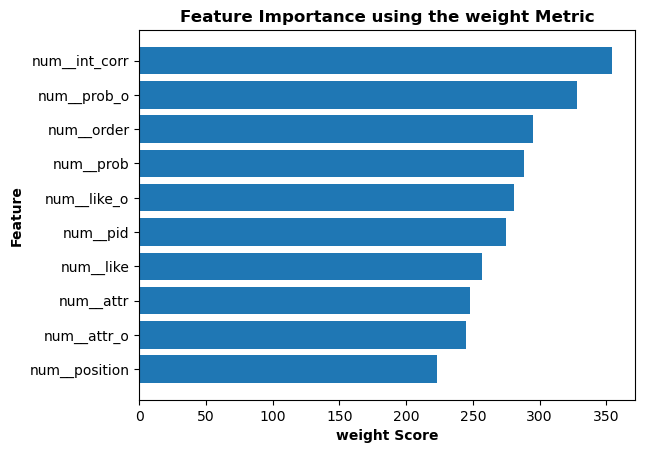

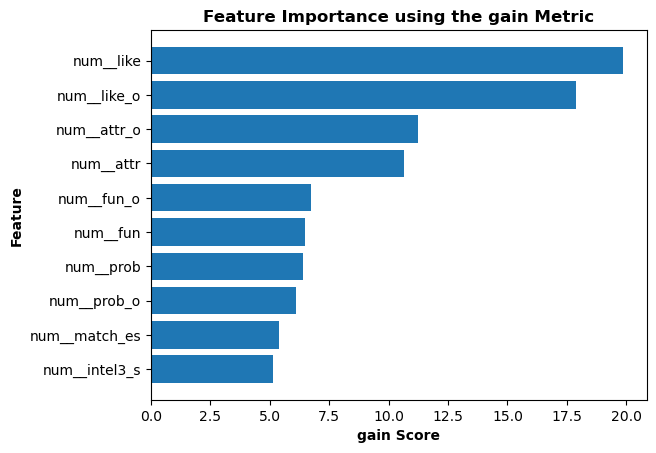

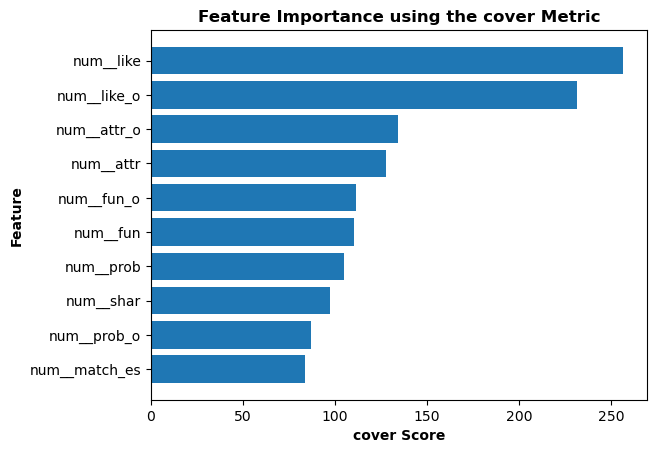

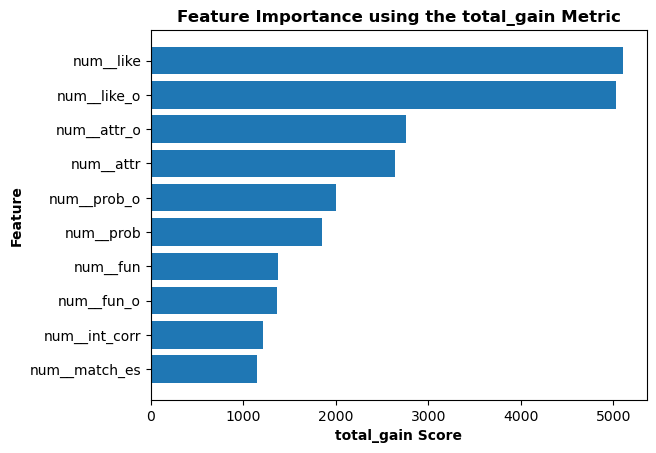

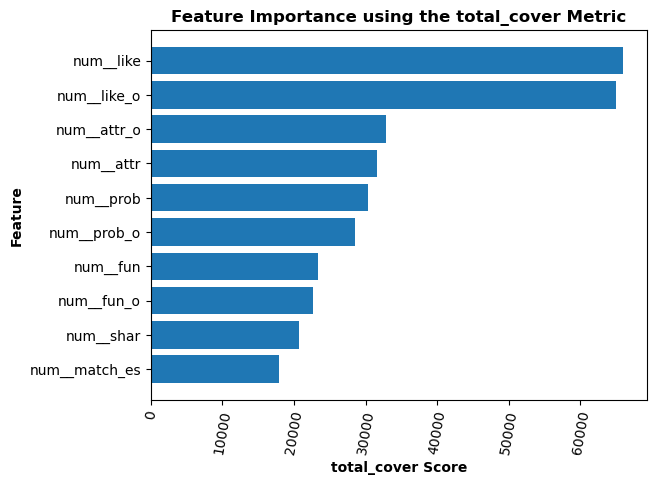

In [12]:
#XGBoost feature importance
# library to sort dictionary
from collections import Counter
import seaborn as sns
# calculate feature importance measurements for all five metrics
metrics = ['weight','gain','cover','total_gain','total_cover']
results = []
# save importance metrics into master list
for metric in metrics:
    results.append(best_xgb_model.get_booster().get_score(fmap="",importance_type=metric))

# plot correct data for each metric
for i, metric in enumerate(results):
    # grab top 10 feature for metric
    c = Counter(metric)
    top10 = c.most_common(10)
    # create and reverse dataframe of info
    mdf = pd.DataFrame(top10).iloc[::-1]
    # create and label plots
    plt.barh(mdf[0],mdf[1])
    # rotate axis for last graph
    if i == 4:
            plt.xticks(rotation=80)
    plt.title('Feature Importance using the {} Metric'.format(metrics[i]),weight='bold')
    plt.ylabel('Feature',weight='bold')
    plt.xlabel('{} Score'.format(metrics[i]),weight='bold')
    plt.show()
        # weight = how many times a feature is used to split
        # gain = average amount of predictive gain from a feature
        # cover = average amount of points that pass through node per tree
        # total_gain = total gain across all trees
        # total_cover = total number of points that pass through feature

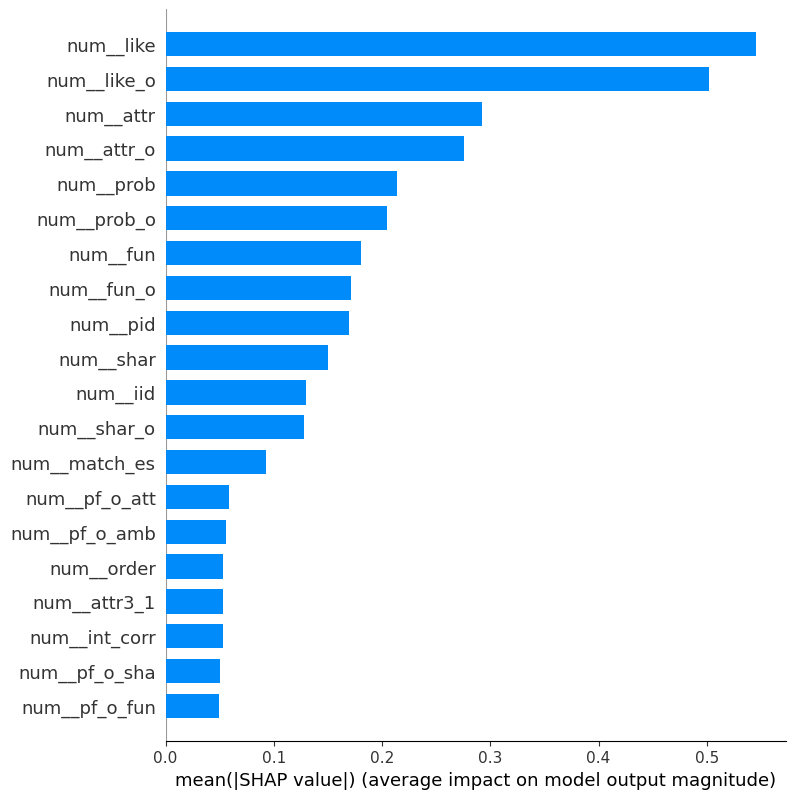

In [13]:
#shap global feature importance graphs
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(df_test)
shap.summary_plot(shap_values,df_test, plot_type="bar")


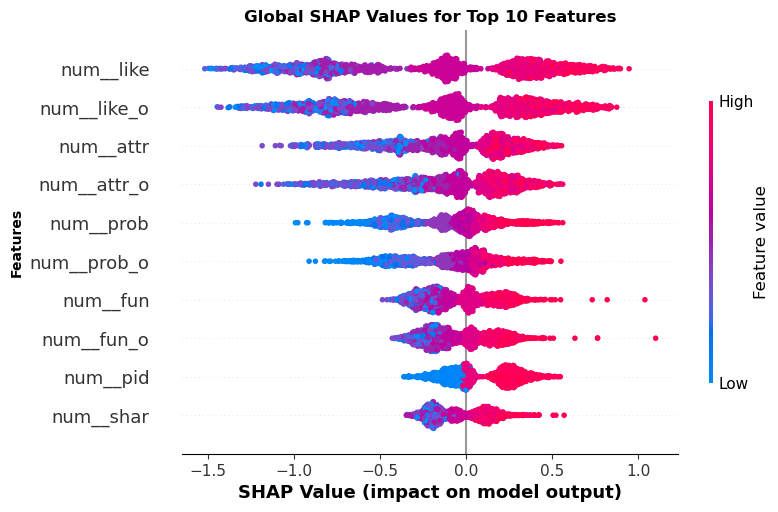

In [14]:
shap.summary_plot(shap_values, df_test,max_display=10,color_bar=True,show=False)
plt.gcf().axes[-1].set_box_aspect(100)
plt.title('Global SHAP Values for Top 10 Features',weight='bold')
plt.ylabel('Features',weight='bold')
plt.xlabel('SHAP Value (impact on model output)',weight='bold')
plt.savefig('xgb_global_ftrs.png')
plt.show()


In [15]:
#XGBoost local importance
#create function to return a shap diagram for any index
import shap
shap.initjs()
def shap_by_ind(index):  
    explainerModel = shap.TreeExplainer(best_xgb_model)
    shap_values_Model = explainerModel.shap_values(df_test)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[index], df_train.iloc[[index]])
    return(p)

In [16]:
shap_by_ind(0)

In [17]:
shap_by_ind(150)

In [18]:
#Identifying false negatives
df_false_neg=df_xgb_results[(df_xgb_results['y_test_pred']==0) & (df_xgb_results['y_test_true']==1)]
df_false_neg.head()

,y_test_pred,y_test_true
4,0,1
18,0,1
43,0,1
48,0,1
53,0,1


In [19]:
#look at false negative 
shap_by_ind(4)

In [20]:
shap_by_ind(18)

In [21]:
shap_by_ind(43)

In [22]:
shap_by_ind(48)

In [23]:
shap_by_ind(53)

In [24]:
#3 additional models:elastic net, support vector machine, KNN
def MLpipe_GroupShuffleSplit_F1(X,y,preproc, ML_alg,param):
    random_state=42
    best_models = []
    test_scores_ls = []
    random_state_ls=[1,2,3,4,5,6,7,8,9,10]
    bl_score_ls=[]
    y_pred_ls=[]
    y_act_ls=[]
    for random_state in random_state_ls:
        model_name=str(clf)[:-2].lower()
        print(model_name)
        if param.get(f'{model_name}__random_state'):
            print(param)
            param[f'{model_name}__random_state']=[random_state]
        # first split to separate out the test set
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
        print('y_test shape:',y_test.shape)
        gss = GroupShuffleSplit(n_splits=4, train_size=.75, random_state=random_state)
        #create bl score on test set
        
        y_row=len(y_test)
        y_dummy_pred=[1] * y_row
        #calculate baseline F1 score
        bl_f1=f1_score(y_dummy_pred, y_test, average='macro')
        bl_score_ls.append(bl_f1)
        print(bl_f1)
        
        #create the pipeline
        pipe=make_pipeline(preproc,ML_alg)
        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param, scoring = 'f1_macro' ,cv=gss, return_train_score = True, n_jobs=-1, verbose=True)
        print(X_other.shape,y_other.shape)
        grid.fit(X_other, y_other.ravel(), groups=X_other['wave'])
        #save results to a df.
        results=pd.DataFrame(grid.cv_results_)
        print(results)    
        #save the model
        best_models.append(grid)
        #calc and save the test score
        y_test_pred= best_models[-1].predict(X_test)
        y_pred_ls.append(y_test_pred)
        y_act_ls.append(y_test)
        print('y_test_pred:', y_test_pred)
        test_score=f1_score(y_test, y_test_pred, average='macro')
        test_scores_ls.append(test_score)
        print('test score:',test_score)
    model_mean=statistics.mean(test_scores_ls)
    model_std=np.std(test_scores_ls)
    print(f'the overall mean of all 10 models is: {model_mean} and the standard deviation is: {model_std}')
    avg_bl=statistics.mean(bl_score_ls)
    print(avg_bl)
    factors_better=(model_mean-avg_bl)/model_std
    print(f'The model is on average {factors_better} better than the baseline')
    return model_mean,model_std,test_scores_ls,best_models,avg_bl,y_pred_ls,y_act_ls
        

In [57]:
#logistic regression
from sklearn.linear_model import LogisticRegression
grid={
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 20),
    'logisticregression__solver' : ['liblinear']}
    
clf = LogisticRegression()

lr_model_mean,lr_model_std, lr_test_scores_ls,lr_best_models,lr_avg_bl,lr_y_pred_ls,lr_y_act_ls=MLpipe_GroupShuffleSplit_F1(X_test,y_test,preprocessor, clf,grid)
print(lr_test_scores_ls)
print(lr_avg_bl)

idx_best_lr_mod=np.argmax(lr_test_scores_ls)
best_lr_model=lr_best_models[idx_best_lr_mod]

lr_y_pred=lr_y_pred_ls[idx_best_lr_mod]
lr_y_act=lr_y_act_ls[idx_best_lr_mod]


logisticregression
y_test shape: (412,)
0.14345114345114346
(1644, 109) (1644,)
Fitting 4 folds for each of 40 candidates, totalling 160 fits


/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.016600      0.004497         0.004596        0.000882   
1        0.018794      0.004047         0.005809        0.002118   
2        0.013243      0.002640         0.004673        0.001883   
3        0.013948      0.001659         0.003983        0.000266   
4        0.013200      0.001603         0.004002        0.000617   
5        0.018271      0.004016         0.003998        0.000548   
6        0.012696      0.003663         0.003421        0.000411   
7        0.014245      0.001982         0.004096        0.001009   
8        0.012060      0.002230         0.005145        0.001352   
9        0.018968      0.003381         0.004947        0.001983   
10       0.013776      0.004513         0.003654        0.000597   
11       0.018518      0.005045         0.003284        0.000226   
12       0.014038      0.003976         0.003202        0.000130   
13       0.019982      0.003474         0.003164

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.009634      0.001226         0.003025        0.000221   
1        0.011286      0.000827         0.002926        0.000066   
2        0.009478      0.001005         0.003158        0.000112   
3        0.012960      0.002275         0.003311        0.000405   
4        0.010683      0.000687         0.003530        0.000819   
5        0.012728      0.002030         0.002891        0.000168   
6        0.008821      0.000759         0.004493        0.002588   
7        0.014551      0.003502         0.003761        0.001511   
8        0.010807      0.001484         0.003143        0.000171   
9        0.017239      0.003097         0.003046        0.000107   
10       0.011589      0.001616         0.003260        0.000494   
11       0.019900      0.005081         0.003021        0.000110   
12       0.012869      0.002404         0.003041        0.000105   
13       0.023160      0.001743         0.003119

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.007864      0.000769         0.002982        0.000273   
1        0.010610      0.002919         0.003160        0.000196   
2        0.010060      0.001559         0.004573        0.001722   
3        0.013101      0.002876         0.004025        0.000339   
4        0.009116      0.001580         0.003909        0.000685   
5        0.012418      0.001449         0.003968        0.001079   
6        0.009844      0.002918         0.003774        0.000538   
7        0.013565      0.002353         0.004501        0.001973   
8        0.010101      0.002383         0.004138        0.000922   
9        0.015754      0.003608         0.003222        0.000260   
10       0.010245      0.002315         0.003171        0.000189   
11       0.020301      0.009915         0.003085        0.000174   
12       0.011723      0.003545         0.004009        0.001520   
13       0.021811      0.002385         0.003773

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.009093      0.000683         0.003068        0.000191   
1        0.010565      0.000882         0.003135        0.000180   
2        0.008764      0.001804         0.003106        0.000151   
3        0.010651      0.001268         0.003343        0.000480   
4        0.010101      0.001016         0.003100        0.000076   
5        0.012648      0.003212         0.003104        0.000162   
6        0.009366      0.001127         0.003102        0.000109   
7        0.012997      0.002091         0.003963        0.001691   
8        0.010864      0.003515         0.003223        0.000313   
9        0.016022      0.004392         0.003100        0.000226   
10       0.010517      0.001765         0.004324        0.002338   
11       0.016436      0.003058         0.003042        0.000148   
12       0.011334      0.001954         0.002946        0.000120   
13       0.022255      0.006565         0.003158

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.024884      0.007388         0.004228        0.001436   
1        0.022504      0.002107         0.004957        0.001227   
2        0.009573      0.000892         0.003035        0.000176   
3        0.012679      0.002217         0.004215        0.001176   
4        0.011098      0.002097         0.004089        0.000796   
5        0.012729      0.002053         0.003298        0.000234   
6        0.013078      0.006363         0.003271        0.000225   
7        0.019488      0.008351         0.005324        0.001935   
8        0.009327      0.001914         0.003504        0.000780   
9        0.018259      0.004167         0.005039        0.001363   
10       0.013418      0.002054         0.004694        0.000984   
11       0.022319      0.007764         0.004188        0.000610   
12       0.015111      0.005388         0.004764        0.000932   
13       0.023246      0.006525         0.004043

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.009198      0.001128         0.003061        0.000194   
1        0.010233      0.000498         0.002975        0.000135   
2        0.008960      0.001767         0.003033        0.000115   
3        0.011823      0.001539         0.003057        0.000197   
4        0.008709      0.000649         0.002963        0.000257   
5        0.011924      0.001851         0.003044        0.000195   
6        0.008361      0.000695         0.003155        0.000264   
7        0.014997      0.003642         0.003070        0.000140   
8        0.011043      0.002743         0.003119        0.000272   
9        0.014913      0.002230         0.003112        0.000147   
10       0.012326      0.003548         0.003589        0.001034   
11       0.018799      0.004589         0.003062        0.000108   
12       0.014728      0.004674         0.003064        0.000213   
13       0.020771      0.003581         0.003031

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.011952      0.002011         0.003496        0.000230   
1        0.014343      0.004173         0.003667        0.000502   
2        0.013923      0.002447         0.003321        0.000192   
3        0.015308      0.004976         0.005238        0.001438   
4        0.022193      0.004566         0.003818        0.000580   
5        0.015025      0.005080         0.003442        0.000415   
6        0.013577      0.001573         0.005860        0.001296   
7        0.018742      0.006024         0.005786        0.002889   
8        0.016809      0.002524         0.004616        0.002420   
9        0.018207      0.004421         0.004534        0.001639   
10       0.014187      0.002078         0.003347        0.000589   
11       0.015119      0.002256         0.003521        0.000909   
12       0.016705      0.004050         0.004465        0.002165   
13       0.021631      0.004813         0.004214

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.009996      0.001395         0.003277        0.000119   
1        0.010867      0.001416         0.003104        0.000120   
2        0.011280      0.001030         0.005138        0.001674   
3        0.013416      0.001977         0.003485        0.000527   
4        0.009004      0.001250         0.003006        0.000141   
5        0.010536      0.000882         0.002889        0.000127   
6        0.009254      0.001165         0.002912        0.000305   
7        0.013159      0.001873         0.003192        0.000317   
8        0.012757      0.005318         0.003055        0.000154   
9        0.015000      0.001639         0.003112        0.000117   
10       0.016057      0.005316         0.003202        0.000185   
11       0.017754      0.004033         0.003432        0.000473   
12       0.011698      0.001671         0.003569        0.000755   
13       0.019884      0.000648         0.003525

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.008026      0.000642         0.003078        0.000189   
1        0.009210      0.000893         0.003091        0.000157   
2        0.008201      0.001160         0.003182        0.000085   
3        0.010592      0.001576         0.003129        0.000132   
4        0.007616      0.000940         0.003013        0.000111   
5        0.011382      0.001470         0.004176        0.000910   
6        0.008796      0.001575         0.004185        0.001582   
7        0.012478      0.002972         0.003918        0.000866   
8        0.008787      0.001773         0.003400        0.000175   
9        0.014245      0.002501         0.003653        0.000943   
10       0.009861      0.001862         0.003877        0.001330   
11       0.015997      0.002827         0.003527        0.000568   
12       0.011937      0.002132         0.003871        0.000807   
13       0.020115      0.003511         0.003936

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.009934      0.000332         0.004197        0.001477   
1        0.011208      0.000211         0.003788        0.000770   
2        0.009975      0.001025         0.003672        0.001049   
3        0.013072      0.000295         0.003604        0.000548   
4        0.009812      0.000912         0.003404        0.000277   
5        0.013511      0.001153         0.003018        0.000071   
6        0.010541      0.001463         0.004821        0.001815   
7        0.015092      0.001038         0.003082        0.000059   
8        0.011784      0.001495         0.003093        0.000125   
9        0.016001      0.002227         0.002943        0.000093   
10       0.011065      0.000563         0.002985        0.000240   
11       0.016493      0.000401         0.003288        0.000311   
12       0.011694      0.000420         0.002847        0.000086   
13       0.018749      0.000415         0.003166

/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
# # import needed libraries
# from sklearn.inspection import permutation_importance
# # calculate feature permutation importance
# print(df_test,y_test)
# ftr_importance = permutation_importance(clf.best_lr_model, df_test, y_test, scoring='f1_macro',
# n_repeats=3, random_state=2)
# # save each feature's importance scores over the 10 trials
# importances = ftr_importance.importances
# # obtain ordered indexes for ascending importance
# ascend_ind = np.argsort(np.mean(importances,axis=1))[::-1]
# # plot and show graph
# plt.rcParams.update({'font.size': 13})
# plt.figure(figsize=(8,4.8))
# plt.boxplot(importances[ascend_ind][:10].T,labels=feature_names[ascend_ind][:10],vert=False)
# plt.axvline(0,label='change in F1_score without permutation')
# plt.title("Permutation Importances of Top 10 Features",weight='bold')
# plt.xlabel('Increase in F1_score with Perturbed Feature',weight='bold')
# plt.ylabel('Feature',weight='bold')
# plt.legend()
# plt.tight_layout()
# plt.show()

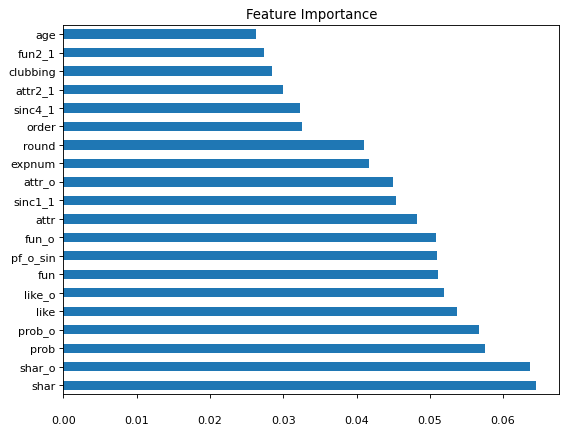

<Figure size 640x480 with 0 Axes>

In [58]:
#get matrix of weights/coeff of logistic regression
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
clf.fit(X_test,y_test)
importance = clf.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance, index = X_test.columns)
fig=feat_importances.abs().nlargest(20).plot(kind='barh',title = 'Feature Importance')
plt.tick_params(axis='x',which='major', pad=15)
figure(figsize=(8, 6), dpi=80)
plt.show()


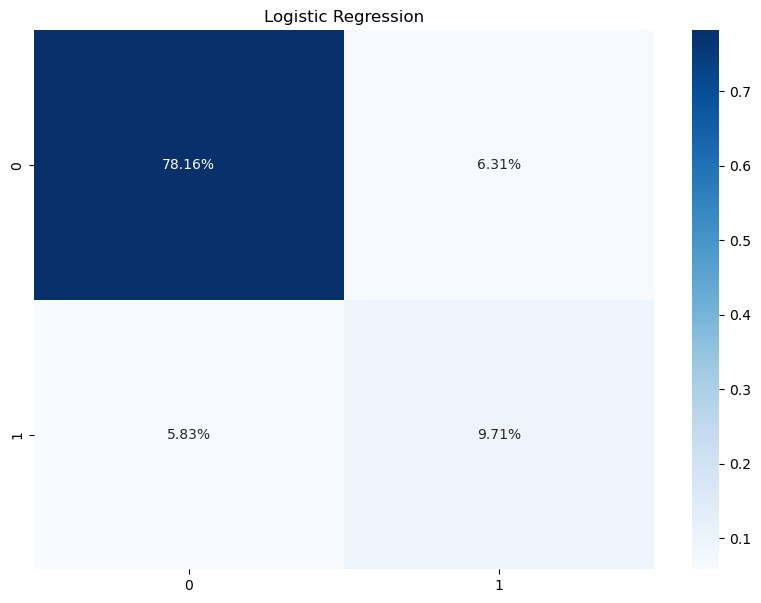

In [45]:
#get confusion matrix
cm=confusion_matrix(lr_y_act_ls[idx_best_lr_mod],lr_y_pred_ls[idx_best_lr_mod])
plt.figure(figsize = (10,7))
ax = plt.axes()
sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues',ax=ax)
ax.set_title('Logistic Regression')
plt.show()

GridSearchCV(cv=GroupShuffleSplit(n_splits=4, random_state=9, test_size=None, train_size=0.75),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['iid', 'gender', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'pid', 'int_corr',
       ...
       'intel1_s', 'fun1_s', 'amb1_...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'log

In [56]:
#shap global feature importance graphs
explainer = shap.Explainer(best_lr_model.predict)
shap_values = explainer.shap_values(df_test)
shap.summary_plot(shap_values,df_test, plot_type="bar")


AttributeError: 'SVC' object has no attribute 'best_lr_model'

In [ ]:
shap.summary_plot(shap_values, df_test,max_display=10,color_bar=True,show=False)
plt.gcf().axes[-1].set_box_aspect(100)
plt.title('Global SHAP Values for Top 10 Features',weight='bold')
plt.ylabel('Features',weight='bold')
plt.xlabel('SHAP Value (impact on model output)',weight='bold')
plt.show()

In [51]:
shap_by_ind(4)

ValueError: feature_names must be unique

In [ ]:
shap_by_ind(40)

In [ ]:
shap_by_ind(400)

In [52]:
#SVC
from sklearn.svm import SVC
# defining parameter range
grid = {'svc__C': [0.1, 1, 10, 100, 1000], 
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf']} 
clf = SVC()
svc_model_mean,svc_model_std, svc_test_scores_ls,svc_best_models,svc_avg_bl,svc_y_pred_ls,svc_y_act_ls=MLpipe_GroupShuffleSplit_F1(X,y,preprocessor, clf,grid)
print(svc_test_scores_ls)

idx_best_svc_mod=np.argmax(svc_test_scores_ls)
best_svc_model=svc_best_models[idx_best_svc_mod]

svc
y_test shape: (1676,)
0.14051282051282052
(6702, 109) (6702,)
Fitting 4 folds for each of 25 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# import needed libraries
from sklearn.inspection import permutation_importance
# calculate feature permutation importance
ftr_importance = permutation_importance(best_svc_model, df_test, y_test, scoring='f1_macro',
n_repeats=10, random_state=2)
# save each feature's importance scores over the 10 trials
importances = ftr_importance.importances
# obtain ordered indexes for ascending importance
ascend_ind = np.argsort(np.mean(importances,axis=1))[::-1]
# plot and show graph
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(8,4.8))
plt.boxplot(importances[ascend_ind][:10].T,labels=feature_names[ascend_ind][:10],vert=False)
plt.axvline(0,label='change in F1_score without permutation')
plt.title("Permutation Importances of Top 10 Features",weight='bold')
plt.xlabel('Increase in F1_score with Perturbed Feature',weight='bold')
plt.ylabel('Feature',weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:


cm=confusion_matrix(svc_y_act_ls[idx_best_svc_mod],svc_y_pred_ls[idx_best_svc_mod])
plt.figure(figsize = (10,7))
ax = plt.axes()
sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues',ax=ax)

ax.set_title('SVC')
plt.show()

In [ ]:
#shap global feature importance graphs

explainer = shap.KernelExplainer(clf,)
shap_values = explainer.shap_values(df_test)
shap.summary_plot(shap_values,df_test, plot_type="bar")


In [ ]:
shap.summary_plot(shap_values, df_test,max_display=10,color_bar=True,show=False)
plt.gcf().axes[-1].set_box_aspect(100)
plt.title('Global SHAP Values for Top 10 Features',weight='bold')
plt.ylabel('Features',weight='bold')
plt.xlabel('SHAP Value (impact on model output)',weight='bold')
plt.show()

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
grid={
    'kneighborsclassifier__leaf_size':[1,3,5,10,20,50],
    'kneighborsclassifier__n_neighbors':[1,3,5,10,20],
    'kneighborsclassifier__p':[1,2]
    
}
clf= KNeighborsClassifier()
knn_model_mean,knn_model_std, knn_test_scores_ls,knn_best_models,knn_avg_bl,knn_y_pred_ls,knn_y_act_ls=MLpipe_GroupShuffleSplit_F1(X,y,preprocessor, clf,grid)
print(knn_test_scores_ls)


idx_best_knn_mod=np.argmax(knn_test_scores_ls)
best_knn_model=knn_best_models[idx_best_knn_mod]


In [ ]:
#comparison of all models mean and std f1 score with baseline 
model_ls=["XG_Boost","Logistic_Regression","SVC","KNN"]
avg_ls=[]
std_ls=[]
bl_ls=[]
avg_ls.extend([XGB_model_mean, lr_model_mean, svc_model_mean,knn_model_mean])
std_ls.extend([XGB_model_std, lr_model_std, svc_model_std,knn_model_std])
bl_ls.extend([XGB_avg_bl, lr_avg_bl, svc_avg_bl, knn_avg_bl])

plt.errorbar(model_ls, avg_ls, std_ls, linestyle='None', marker='^')
plt.plot(model_ls, bl_ls, color='black',marker='o')
plt.ylabel('F1 Macro')
plt.show()